# Investigating the TMDB Movie Database

**Table of Contents**

_ Introduction

_ Data Wrangling

_ Exploratory Data Analysis

_ Analyzing Data - Answering Research Questions

_ Conclusion

**Introduction**

The dataset chosen here gives information about 10,866 movies collected from The Movie Database from over a period of 56 years, i.e. 1961 to 2015. The data analyzed here is along the parameters of genre and years. Other main features analyzed in the dataset include, the movie budget along with budget ajdusted for inflation, the revenue and inflation-adjusted revenue the movie generated, the popularity of the movie along with the number of votes it received. 

Other features present in the dataset but not explored in the analysis include, cast, keywords, overviews and production companies. Production companies would have been an interesting feature to explore but it had too many missing values and was hence dropped. 

Questions analyzed and answered in this project are as follows;

a) Highest Proportion of Movies by Genre

b) Popularity of Movies by Genre

c) Average Adjusted Budget by Genre

d) Average Adjusted Revenues by Genre

e) Average Revenue and Average Adjusted Revenue over the Years

f) Top 10 Movies with the Highest Revenues


*Importing Relevant Libraries and Dataset*

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline


sns.set_style('whitegrid')

df_movies = pd.read_csv('tmdb-movies.csv')

**Data Wrangling**

In [2]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The datatypes for each column seem apprpriate except release_date which can be converted to datetime if there is a need.
The columns which are not relevant to this analysis and/or have missing values can be dropped.

In [3]:
df_movies.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date'], axis=1, inplace=True)

There are missing values in the 'genres' column so we will drop these rows

In [4]:
df_movies.dropna(inplace=True)

In [5]:
df_movies.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


While we've deleted the missing values, we should check for any 0 values.

In [6]:
0 in df_movies[['revenue', 'budget', 'budget_adj', 'revenue_adj']].values

True

In [7]:
0 in df_movies['revenue'].values

True

In [8]:
print((df_movies[['revenue', 'budget', 'budget_adj', 'revenue_adj']] == 0).sum())

revenue        5993
budget         5674
budget_adj     5674
revenue_adj    5993
dtype: int64


Since there are a lot of 0 values, we will drop those. Replacing with mean or median will not be suitable here since almost half the data values are missing. 

In [9]:
df_movies['revenue'] = df_movies['revenue'].replace(0, np.nan)



In [10]:
df_movies['revenue_adj'] = df_movies['revenue_adj'].replace(0, np.nan)
df_movies['budget'] = df_movies['budget'].replace(0, np.nan)
df_movies['budget_adj'] = df_movies['budget_adj'].replace(0, np.nan)

In [11]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10843 non-null  int64  
 1   popularity      10843 non-null  float64
 2   budget          5169 non-null   float64
 3   revenue         4850 non-null   float64
 4   original_title  10843 non-null  object 
 5   genres          10843 non-null  object 
 6   vote_count      10843 non-null  int64  
 7   vote_average    10843 non-null  float64
 8   release_year    10843 non-null  int64  
 9   budget_adj      5169 non-null   float64
 10  revenue_adj     4850 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1016.5+ KB


Now we'll drop these missing values.

In [12]:
df_movies.dropna(inplace = True)

In [13]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3855 non-null   int64  
 1   popularity      3855 non-null   float64
 2   budget          3855 non-null   float64
 3   revenue         3855 non-null   float64
 4   original_title  3855 non-null   object 
 5   genres          3855 non-null   object 
 6   vote_count      3855 non-null   int64  
 7   vote_average    3855 non-null   float64
 8   release_year    3855 non-null   int64  
 9   budget_adj      3855 non-null   float64
 10  revenue_adj     3855 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 361.4+ KB


The number of entries we are now dealing with is 3855.

**Exploratory Data Analysis**

In [14]:
df_movies.corr()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.188871,-0.027450,-0.003212,0.111462,-0.001281,0.489895,-0.124036,-0.088288
popularity,0.188871,1.000000,0.446993,0.615556,0.780106,0.317924,0.173179,0.399375,0.546985
budget,-0.027450,0.446993,1.000000,0.688548,0.556939,0.024227,0.267984,0.958518,0.533497
revenue,-0.003212,0.615556,0.688548,1.000000,0.754583,0.227279,0.139001,0.657577,0.900892
vote_count,0.111462,0.780106,0.556939,0.754583,1.000000,0.387271,0.207073,0.497988,0.654713
vote_average,-0.001281,0.317924,0.024227,0.227279,0.387271,1.000000,-0.134493,0.036913,0.266996
release_year,0.489895,0.173179,0.267984,0.139001,0.207073,-0.134493,1.000000,0.075032,-0.103260
budget_adj,-0.124036,0.399375,0.958518,0.657577,0.497988,0.036913,0.075032,1.000000,0.570466
revenue_adj,-0.088288,0.546985,0.533497,0.900892,0.654713,0.266996,-0.103260,0.570466,1.000000


Using the correlation function, we can identify which features can be further explored together for our analysis.
It can be seen that popularity has a high positive correlation with budget, revenue, budget_adj, revenue_adj and understandably with vote_count. 
Budget and budget_adj have a high positive correlation with revenue, revenue_adj and vote count.
We will explore these features in further detail. 

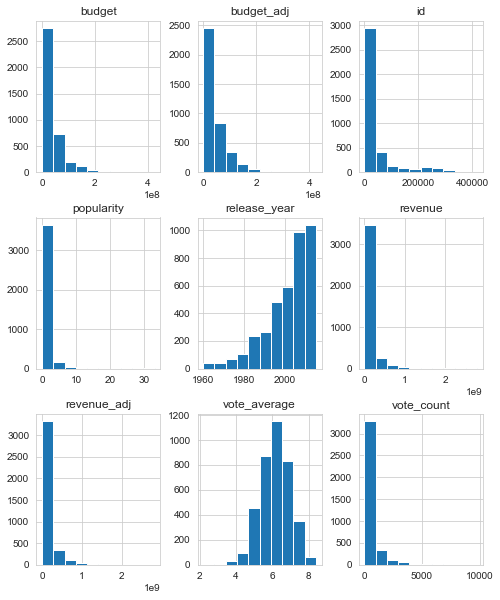

In [15]:
df_movies.hist(figsize=(8,10));

Using histograms we can see that the distribution of budget and budget_adj is skewed right which implies that there might be a few uncharacteristically high budget movies in the dataset. Similarly for revenue and revenue_adj the right-skewed histograms indicate that there might be some high-earning movies in the dataset. It can also be seen from the left-skewed release_year histogram that more movies were being produced after 2000. The vote_average shows a more normal distribution.

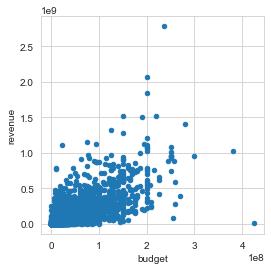

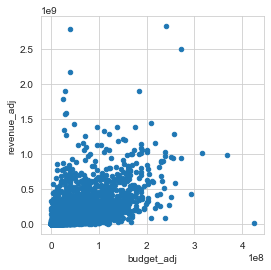

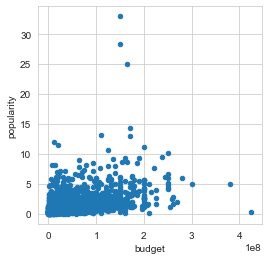

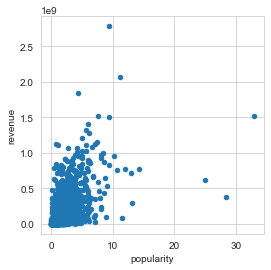

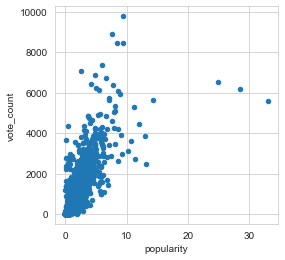

In [16]:
df_movies.plot(x='budget', y='revenue', kind='scatter', figsize = (4,4))
df_movies.plot(x='budget_adj', y='revenue_adj', kind='scatter', figsize = (4,4))
df_movies.plot(x='budget', y='popularity', kind='scatter', figsize = (4,4))
df_movies.plot(x='popularity', y='revenue', kind='scatter', figsize = (4,4))
df_movies.plot(x='popularity', y='vote_count', kind='scatter', figsize = (4,4));

From the scatterplots above, a positive correlation can be seen between the budget and revenue, where an increase in budget is likely to increase revenue but by a small amount. Similarly, a positive correlation can be seen between budget_adj and revenue_adj.

It can be seen again that there is a positive correlation between popularity and budget, but an increase in the budget is not likely to significantly increase the popularity. A high positive correlation can be seen between popularity and revenue, which intuitively makes sense, if a movie is popular it is likely to generate more revenue. 

There is a positive correlation between popularity and vote_count, when the popularity of a movie is high, it is likely to get a higher number of votes. 

**Analyzing Data - Answering Research Questions**

We will start by analyzing the 'genres' category.

In [17]:
df_movies['genres'].value_counts()

Drama                                   245
Comedy                                  233
Drama|Romance                           107
Comedy|Romance                          104
Comedy|Drama|Romance                     91
                                       ... 
Animation|Science Fiction|Thriller        1
Comedy|Thriller|Crime|Action              1
Drama|Thriller|Mystery|Music|Romance      1
Action|Thriller|Drama|Western|Crime       1
Crime|Comedy|Action|Adventure             1
Name: genres, Length: 1053, dtype: int64

In [18]:
df_movies['genres'].nunique()

1053

It can be seen in the 'genres' category, that one movie can belong to different genres which are all listed together. In order to make our analysis easier we will split the multi-genre categories to get one unique genre per row. Currently the number of unique genres is 1053. 

In [19]:
g = df_movies['genres'].str.split('|').apply(Series,1).stack()
g.index = g.index.droplevel(-1)
g.name = 'genres'
del df_movies['genres']
df_movies = df_movies.join(g)


In [20]:
df_movies['genres'].nunique()

20

Following the above string-split function, the number of unique genres is now 20, which is much more manageable. We then get the following unique genre categories.

In [21]:
df_movies['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

**a) Highest Proportion of Movies by Genre**

In [41]:
movies_by_genres = df_movies.groupby('genres').size().sort_values(ascending=False)
movies_by_genres

genres
Drama              1757
Comedy             1358
Thriller           1205
Action             1086
Adventure           749
Romance             667
Crime               652
Science Fiction     520
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

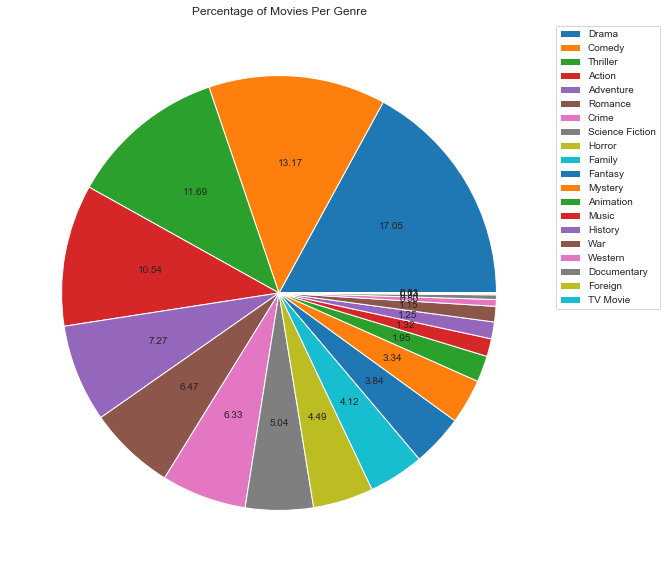

In [42]:
plt.figure(figsize=(30,10))
plt.pie(movies_by_genres, autopct = '%.2f')
plt.title('Percentage of Movies Per Genre')
plt.legend(['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure',
       'Romance', 'Crime', 'Science Fiction', 'Horror', 'Family', 'Fantasy',
       'Mystery', 'Animation', 'Music', 'History', 'War', 'Western',
       'Documentary', 'Foreign', 'TV Movie'], bbox_to_anchor=(1,1))
plt.show()

From the above pie chart, it can be seen that the highest number of movies produced has been in the "Drama" category followed by "Comedy", "Thriller" and "Action".

**b) Average Popularity of Movies by Genre**

The popularity feature has some outliers, so we'll use the following step to remove the top 0.1 quantile to get more accurate results. The outlier values can show a higher popularity of genres which might not stand true once the outliers are removed.   

In [50]:
q = df_movies["popularity"].quantile(0.9)
q

2.576396

In [51]:
df_movies1 = df_movies[df_movies['popularity'] < q]
df_movies1['popularity'].max()

2.575711

In [52]:
popularity = df_movies1.groupby('genres').mean()['popularity'].sort_values(ascending=False)
popularity

genres
Animation          1.183512
Fantasy            1.136246
Adventure          1.072227
Family             1.021709
War                0.983237
Science Fiction    0.978456
Action             0.972450
Thriller           0.890902
Crime              0.858592
Mystery            0.852803
History            0.850711
Comedy             0.841528
Romance            0.824565
Drama              0.786766
Western            0.776064
Horror             0.768030
Music              0.757563
Documentary        0.294458
TV Movie           0.273628
Foreign            0.179608
Name: popularity, dtype: float64

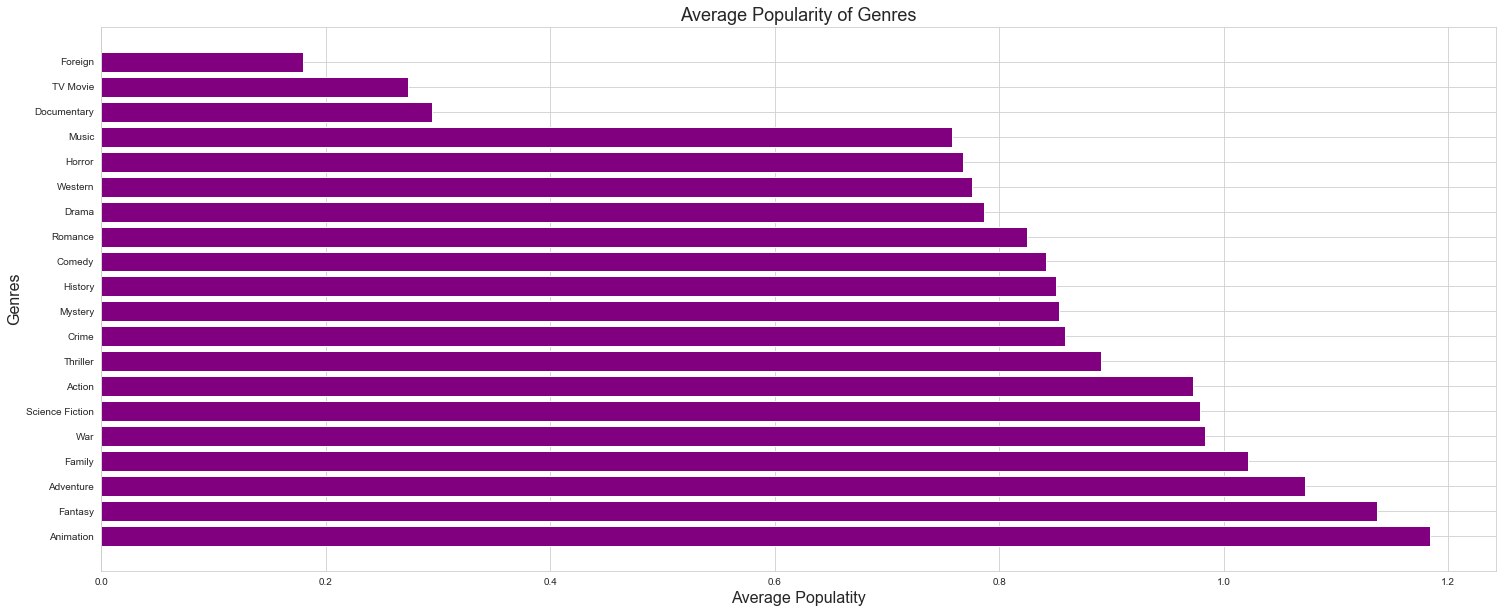

In [53]:
heights = popularity
labels = ['Animation', 'Fantasy', 'Adventure', 'Family', 'War', 'Science Fiction', 'Action', 'Thriller', 'Crime', 'Mystery', 'History', 'Comedy', 'Romance', 'Drama', 'Western', 'Horror', 'Music', 'Documentary', 'TV Movie', 'Foreign']
plt.figure(figsize=(25,10))
plt.barh(labels, heights, tick_label=labels, color ='purple')
plt.title('Average Popularity of Genres', fontsize='18')
plt.xlabel('Average Populatity', fontsize = '16')
plt.ylabel('Genres', fontsize = '16');

From the above, we see that the on average "animation" movies are the most popular, followed by "fantasy", "adventure" and "family". 

**c) Average Adjusted Budget for Genres**

In [39]:
mean_adj_budget =df_movies.groupby('genres').budget_adj.mean().sort_values(ascending=False)
mean_adj_budget

genres
Animation          8.347215e+07
Adventure          8.125573e+07
Fantasy            8.023752e+07
Family             7.110099e+07
Western            6.719107e+07
Action             6.640907e+07
Science Fiction    6.554873e+07
War                5.727295e+07
History            5.687985e+07
Thriller           4.458965e+07
Mystery            4.236264e+07
Crime              3.989487e+07
Comedy             3.917646e+07
Music              3.519802e+07
Drama              3.470978e+07
Romance            3.390431e+07
Horror             2.324071e+07
Foreign            1.289824e+07
TV Movie           6.951084e+06
Documentary        5.379702e+06
Name: budget_adj, dtype: float64

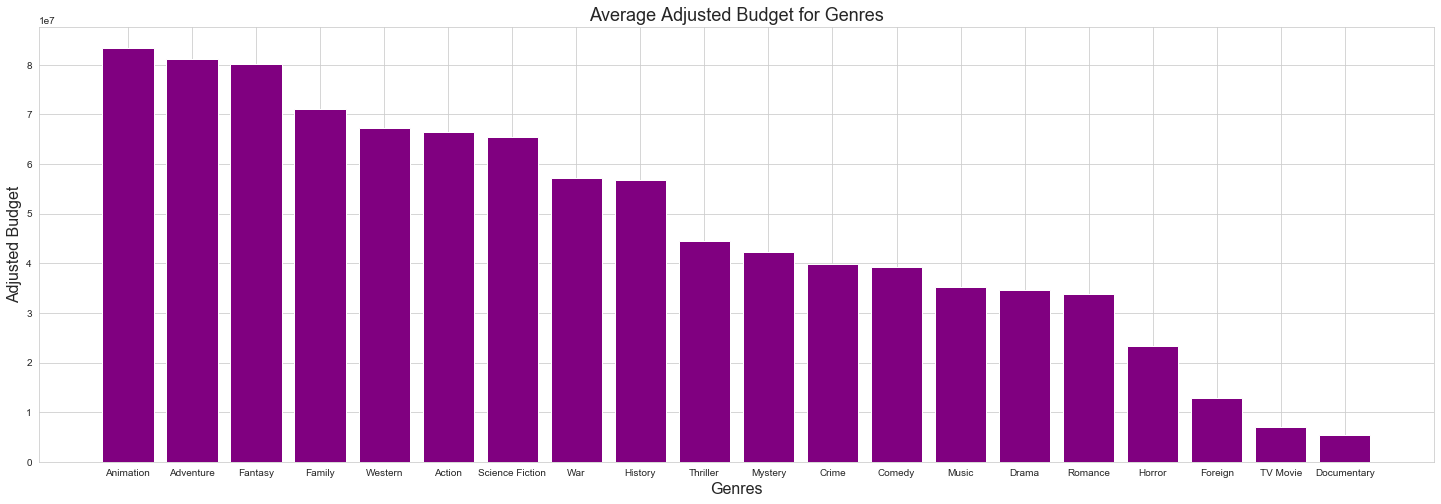

In [55]:
labels = ['Animation', 'Adventure','Fantasy', 'Family', 'Western', 'Action', 'Science Fiction', 'War', 'History', 'Thriller', 'Mystery', 'Crime', 'Comedy', 'Music', 'Drama', 'Romance', 'Horror', 'Foreign', 'TV Movie', 'Documentary']
plt.figure(figsize=(25,8))
plt.bar(labels, mean_adj_budget, tick_label=labels, color = 'purple')
plt.title('Average Adjusted Budget for Genres', fontsize = '18')
plt.xlabel('Genres', fontsize = '16')
plt.ylabel('Adjusted Budget', fontsize = '16');

On average, it is seen that "animation" movies have the highest adjusted budget, followed by "adventure", "fantasy" and "family". Conversely, "documentary" and "TV movies" have the lowest adjusted budget. 

**d) Average Adjusted Revenues by Genre**

In [56]:
mean_adj_revenue = df_movies.groupby('genres').revenue_adj.mean().sort_values(ascending=False)
mean_adj_revenue

genres
Animation          2.909574e+08
Adventure          2.714075e+08
Fantasy            2.499928e+08
Family             2.437910e+08
Science Fiction    2.017662e+08
Action             1.952089e+08
War                1.558981e+08
Western            1.356748e+08
Music              1.345660e+08
Thriller           1.280653e+08
History            1.216617e+08
Comedy             1.213085e+08
Mystery            1.136210e+08
Romance            1.135198e+08
Crime              1.102273e+08
Drama              1.013213e+08
Horror             8.140656e+07
TV Movie           5.838910e+07
Documentary        2.480617e+07
Foreign            1.273378e+07
Name: revenue_adj, dtype: float64

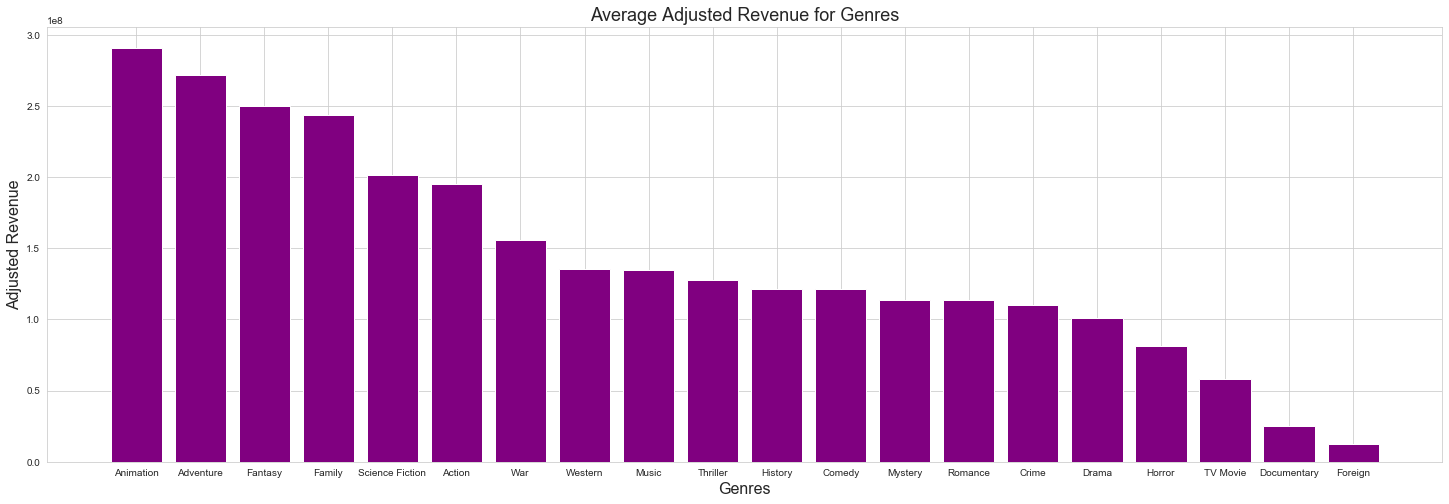

In [57]:
labels = ['Animation', 'Adventure','Fantasy', 'Family', 'Science Fiction', 'Action', 'War', 'Western', 'Music', 'Thriller', 'History', 'Comedy', 'Mystery', 'Romance', 'Crime', 'Drama', 'Horror', 'TV Movie', 'Documentary', 'Foreign']
plt.figure(figsize=(25,8))
plt.bar(labels, mean_adj_revenue, tick_label=labels, color = 'purple')
plt.title('Average Adjusted Revenue for Genres', fontsize = '18')
plt.xlabel('Genres', fontsize = '16')
plt.ylabel('Adjusted Revenue', fontsize = '16');

The figure above shows that "animation" movies on average receive the highest revenues after adjusting for inflation. This category is followed by "adventure", "fantasy" and "family". 

**e) Average Revenue and Average Adjusted Revenue over the years**

In [32]:
revenue =df_movies.groupby(['release_year']).revenue.mean()

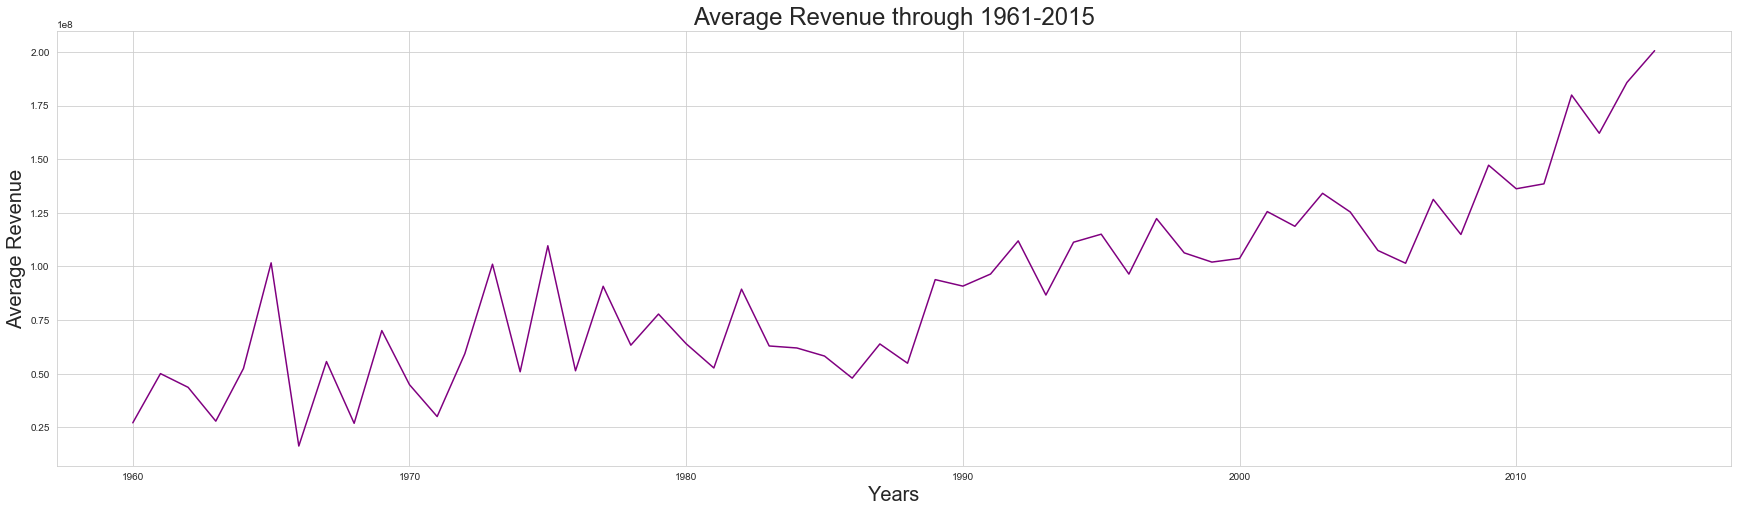

In [58]:
plt.figure(figsize = (30,8))
revenue.plot(kind='line', color = 'purple')
plt.title('Average Revenue through 1961-2015', fontsize = '24')
plt.xlabel('Years', fontsize = '20')
plt.ylabel('Average Revenue', fontsize = '20');

From the above it can be seen that average revenue has steadily increased over the time period 1961 to 2015, with few ups and downs during the years. 

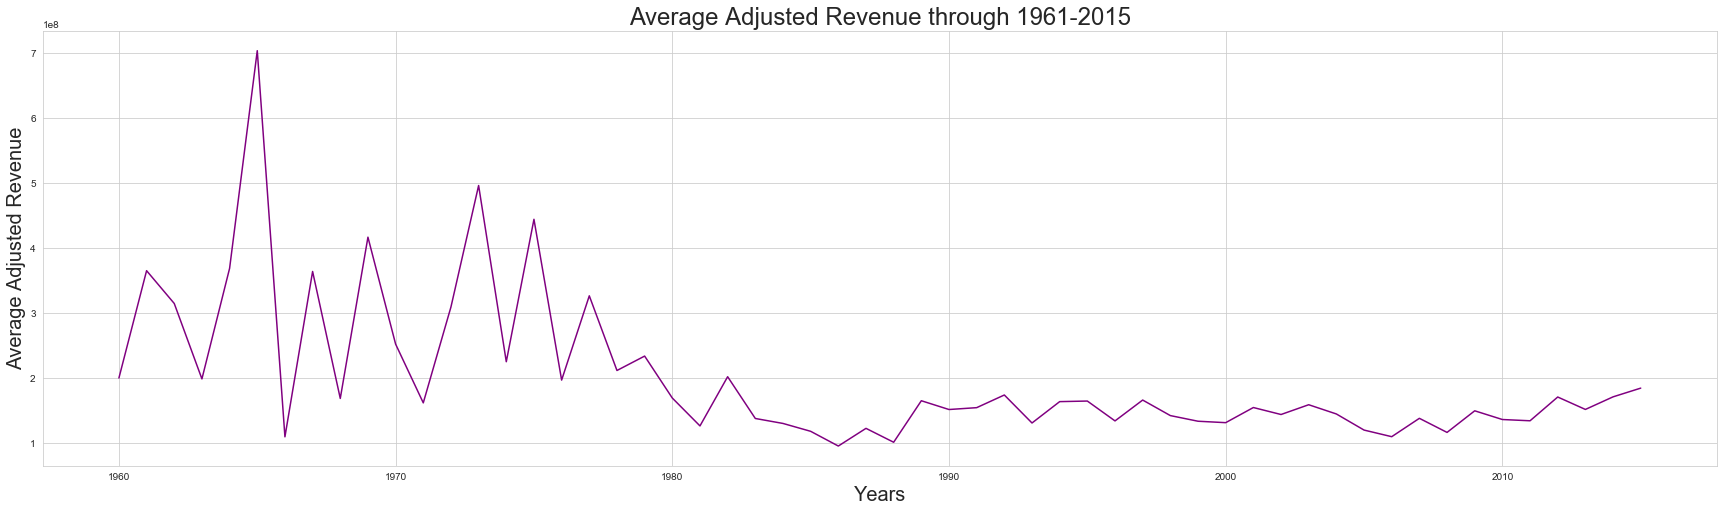

In [34]:
revenue_adj =df_movies.groupby(['release_year']).revenue_adj.mean()
plt.figure(figsize = (30,8))
revenue_adj.plot(kind='line', color = 'purple')
plt.title('Average Adjusted Revenue through 1961-2015', fontsize = '24')
plt.xlabel('Years', fontsize = '20')
plt.ylabel('Average Adjusted Revenue', fontsize = '20');

However, adjusted average revenue follows a different trend. In real terms, the average revenue from movies has had a less clear relationship, following erratic ups and downs until 1980 but a relatively smoother trend after 1980, with less erratic ups and downs. On the whole, it can be said that the adjusted revenue has remained relatively the same, in fact showing a slight decline. 

**f) Top 10 Movies with the Highest Revenues**

In [35]:
top_movies = df_movies.groupby('original_title').revenue.mean().sort_values(ascending=False)

In [36]:
top_movies.head(10)

original_title
Avatar                                          2.781506e+09
Star Wars: The Force Awakens                    2.068178e+09
Titanic                                         1.845034e+09
Jurassic World                                  1.513529e+09
Furious 7                                       1.506249e+09
Avengers: Age of Ultron                         1.405036e+09
Harry Potter and the Deathly Hallows: Part 2    1.327818e+09
Frozen                                          1.274219e+09
Iron Man 3                                      1.215440e+09
Minions                                         1.156731e+09
Name: revenue, dtype: float64

In [63]:
df_movies.query('original_title == "Titanic"')

,id,popularity,budget,revenue,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,4654,7.3,1997,2.716921e+08,2.506406e+09,Drama
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,4654,7.3,1997,2.716921e+08,2.506406e+09,Romance
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,4654,7.3,1997,2.716921e+08,2.506406e+09,Thriller


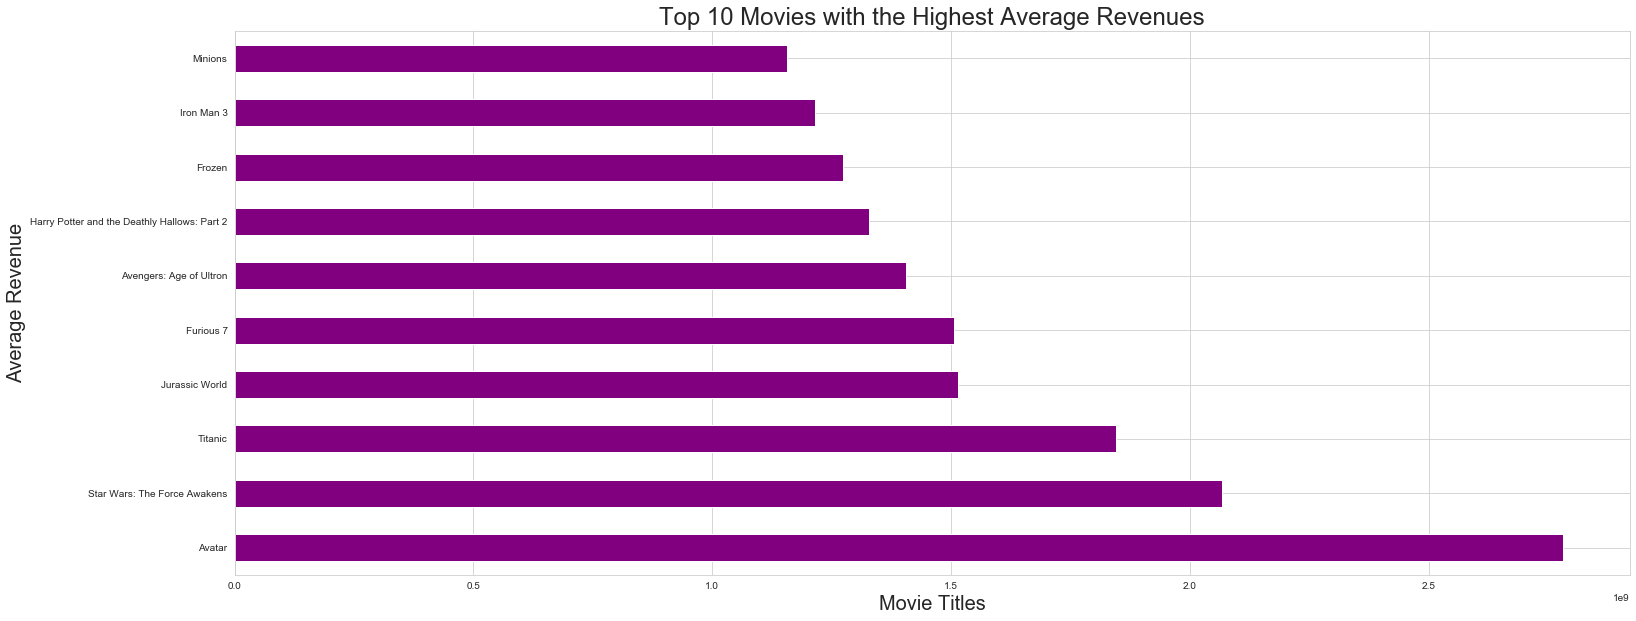

In [37]:
plt.figure(figsize=(25,10))
top_movies.head(10).plot(kind='barh', color= 'purple')
plt.title('Top 10 Movies with the Highest Average Revenues', fontsize = '24')
plt.xlabel('Movie Titles', fontsize = '20')
plt.ylabel('Average Revenue', fontsize = '20');

The highest revenue earning movie on average is "Avatar", followed by "Star Wars", Titanic and "Jurassic World".

**Conclusion**

In this project we have analyzed the movie data by genre and by year. There are 20 unique genres identified in the dataset and the questions answered here pertain to the number of movies produced per genre, the average popularity of every genre, average adjusted budget for every genre and the average adjusted revenue earned by every genre. The adjusted figures are used to assess the earnings and expenditure in real terms. 

It is seen that while the highest number of movies made has been in the "drama" category, "animation" movies top the list for average popularity, highest average adjusted budget and highest average adjusted revenue. 

The top 3 categories of movies for average popularity, average adjusted budget, average adjusted revenue are, "Animation", "Fantasy" and "Adventure".

The occurence of similar genres in all three features again shows a positive correlation between popularity and budget, popularity and revenue and budget and revenue as was seen in our earlier analysis when identifying correlations. 


The second aspect analyzed here is gauging the change in revenue earned over the course of the 56 year period. It is seen that while the average revenue has increased over the years, on average the change in adjusted revenue is not that conclusively clear, and in real terms the change in revenue is not that significant, rather it is seen to show a slight decline. 

Finally, the top 10 movies are shown which have had the highest revenue in the time period defined. Of the top 4 movies here, Avatar, Star Wars, Titanic and Jurassic World, 3 belong to the categories, "Action", "Adventure", "Fantasy". 

Titanic had the third highest average revenue but belonged to the genres "Drama", "Romance" and "Thriller". 